# <font color='289C4E'>Exploration Numérique 1
**Élèves**: Sadegh ABDERRAHIM & Gabriel PEREIRA DE CARVALHO & Otávio RIBAS

### <font color='289C4E'>Table des matières<font><a class='anchor' id='top'></a>
- [Python Imports](#imports)
- [Exercice 1](#1)
- [Exercice 2](#2)
- [Exercice 3](#3)
- [Exercice 4](#4)
- [Exercice 5](#5)
- [Exercice 6](#6)
- [Exercice 7](#7)

<h2 align="center"> <font color='gray'>Python Imports</font></h2> <a class="anchor" id="imports"></a>

Dans cette section, on va importer tous les paquets qu'on ira utiliser plus tard.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats

<h2 align="center"> <font color='blue'>Exercice 1</font></h2> <a class="anchor" id="1"></a>

D'aprés ce qu'on a traité dans le PC on a que  :

$ \begin{equation} \hat{\beta} = (T^{T}T)^{-1}T^{T}X \end{equation}$ avec $\begin{equation}\hat{\beta} = \begin{pmatrix} \hat{\beta}_1 \\ \hat{\beta}_2 \end{pmatrix} \end{equation}$ et    $\begin{equation} T = \begin{bmatrix} \mathbf{1} & \mathbf{t} \end{bmatrix}\end{equation} $ .

comme $\begin{equation} T^T T = \begin{bmatrix} n & \sum_{i=1}^{n} T_i \\
    \sum_{i=1}^{n} T_i & \sum_{i=1}^{n} T_i^{2} \end{bmatrix} \end{equation}$
alors $   \begin{equation} (T^T T)^{-1} = \frac{1}{n\sum_{i=1}^{n} T_i^{2}-(\sum_{i=1}^{n} T_i)^{2}} \begin{bmatrix} \sum_{i=1}^{n} T_i^{2} & -\sum_{i=1}^{n} T_i \\  -\sum_{i=1}^{n} T_i & n \end{bmatrix} \end{equation}$ , ainsi d'aprés un simple calcul on obtient que :

$$\begin{align}
\begin{cases}
    \hat{\beta}_2 &=\frac{\sum_{i=1}^{n} (t_i -\bar{t})X_i}{\sum_{i=1}^{n} (t_i -\bar{t})^2}\\
    \hat{\beta}_1 &= \bar{X}-\hat{\beta}_2\bar{t}
\end{cases}
\end{align}$$

<h2 align="center"> <font color='blue'>Exercice 2</font></h2> <a class="anchor" id="2"></a>

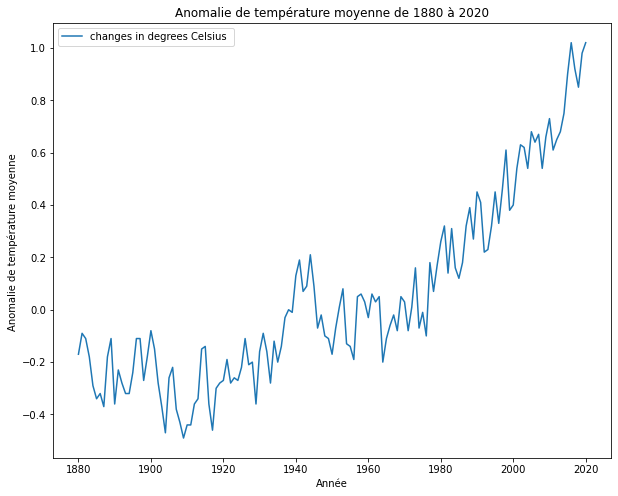

In [2]:
# charger les données 
url= "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
data=pd.read_csv(url, skiprows=1) # pour qu'il saute la première ligne qui contient juste 

# Convertir la colonne "year" en datetime pour qu'elle soit reconnue comme une année
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Filtrer les données pour la période de 1880 à 2020
data = data[(data['Year'].dt.year >= 1880) & (data['Year'].dt.year <= 2020)]

# Convertir la colonne 'J-D' en type numérique (float)
data['J-D'] = data['J-D'].str.replace(',', '').astype(float)

# traçons la courbe de la valeur moyenne des annomalies de température de 1880 à 2020 
plt.figure(figsize=(10, 8))
plt.plot(data['Year'], data['J-D'], label='changes in degrees Celsius ' )
plt.xlabel('Année')
plt.ylabel('Anomalie de température moyenne ')
plt.title('Anomalie de température moyenne de 1880 à 2020')
plt.legend()
plt.show()

<h2 align="center"> <font color='blue'>Exercice 3</font></h2> <a class="anchor" id="3"></a>

In [3]:
liste_beta_1=[]
liste_beta_2=[]
liste_std=[]
liste_std_1=[]
liste_std_2=[]

for j in range(0,10):
    t=np.array([ i for i in range(1880+j*10,1921+j*10)])

    #Variables auxiliares pour construir liste d'observation X1 ,.....,X40
    debut_annee = pd.to_datetime(str(1880+j*10), format='%Y')
    fin_annee = pd.to_datetime(str(1920+j*10), format='%Y')
    periode = (data['Year'] >= debut_annee) & (data['Year'] <= fin_annee)
    T = data.loc[periode, 'Year']

    # Construction de la liste d'observation X1, ..., X40
    obs = []
    for annee in T:
        # on utilise la méthode loc pour accéder à la valeur de 'J-D' pour 'Year' égal à annee
        valeur = data.loc[data['Year'] == annee, 'J-D'].values[0]
        obs.append(valeur)
    X = np.array(obs)

    # calcul du beta 2 
    s1=0
    s2=0
    for i in range(40):
        s1+= (t[i]-np.mean(t))*X[i]
        s2+= (t[i]-np.mean(t))**2

    
    beta_2= s1/s2
    
    #calcul du beta 1 
    beta_1= np.mean(X)-beta_2*np.mean(t)
    
    #calcul du standard deviation 
    std= (1/40) * np.sum(np.square(X - beta_1 - beta_2*t))
    
    #calcul du std_1et std_2
    std_1=std*(np.sum([i**2 for i in t])/(40*(np.sum([(i-np.mean(t))**2 for i in t]))))
    std_2=std/(np.sum([(i-np.mean(t))**2 for i in t]))
                                          
    
    liste_beta_1.append(beta_1)
    liste_beta_2.append(beta_2)
    liste_std.append(std)
    liste_std_1.append(std_1)
    liste_std_2.append(std_2)                                     

    
# affichons les valeurs pour chaque intervalle 
print(liste_beta_1)
print(liste_beta_2)
print(liste_std)

[5.418493651228648, -2.1617918151091566, -13.98896958070704, -23.691290307846895, -14.08147437654152, -3.223531104412166, 0.653797387412077, -17.95677719923267, -26.7092408879145, -32.602798940348954]
[-0.00299625468164794, 0.0009868913857677872, 0.007161048689138576, 0.012192883895131084, 0.0072134831460674165, 0.0016348314606741564, -0.0003295880149812737, 0.009146067415730338, 0.01357303370786517, 0.01654681647940075]
[0.011542528686907874, 0.011864814349672192, 0.012973346331267871, 0.012126512068918047, 0.013005285566924605, 0.012121123731374757, 0.013014838269441904, 0.011617451230289351, 0.009949209683428719, 0.008572365527949013]


<h2 align="center"> <font color='blue'>Exercice 4</font></h2> <a class="anchor" id="4"></a>

On a : 

$$ \frac{\hat{\sigma}_{n}^2 \cdot (n - 2)}{\sigma^{2}} \sim \chi^2_{(n-2)} $$

et donc  en notant $q_{\frac{\alpha}{2}}^{n-2}  $  et   $q_{1-\frac{\alpha}{2}}^{n-2} $ les quantiles d’ordre $\frac{\alpha}{2}$ et $1 - \frac{\alpha}{2}$ d’une loi $\chi^2_{(n-2)}$  ,  nous avons que : 
$$ \lbrack n\frac{\hat{\sigma}^{2}}{q_{1-\frac{\alpha}{2}}^{n-2}} ; n\frac{\hat{\sigma}^{2}}{q_{\frac{\alpha}{2}}^{n-2}} \rbrack $$ 


est un intervalle de confiance de niveau $1 - \alpha$ pour l’estimation de $\sigma^{2}$. dans notre cas on prend $n=40$ et $\alpha = 0.05$

In [4]:
#calculons la valeur des quantiles 
quantile_1= quantile = stats.chi2.ppf(1 - (0.05/2), 40-2)
quantile_2= quantile = stats.chi2.ppf((0.05/2), 40-2)

# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for j in range(0,10):
    borne_1= (40*liste_std[j])/quantile_1
    borne_2= (40*liste_std[j])/quantile_2
    print(f"[{borne_1} ; {borne_2}]")

[0.00811489451426742 ; 0.020180584570352243]
[0.008341475207955418 ; 0.020744058419943315]
[0.009120820907701787 ; 0.022682179953824003]
[0.008525459969345981 ; 0.021201602264828836]
[0.009143275565190722 ; 0.022738021482467046]
[0.00852167173611242 ; 0.021192181469400422]
[0.00914999152625582 ; 0.022754723119192837]
[0.008167568287300439 ; 0.02031157672674608]
[0.006994722670512207 ; 0.01739487705604203]
[0.006026741963045883 ; 0.01498764717829703]


Pour j=1,2 on a que $$\frac{\hat{\beta_{j}}-\beta_{j}}{\hat{\sigma_{j}}} \sim t_{n-2} $$

et donc de meme en notant $q_{\frac{\alpha}{2}}^{n-2}  $  et   $q_{1-\frac{\alpha}{2}}^{n-2} $ les quantiles d’ordre α/2 et 1 − α/2 d’une loi $t_{n-2}$  ,  nous avons que : 
$$ \lbrack  \beta_{j}-q_{1-\frac{\alpha}{2}}\hat{\sigma_{j}}  ; \beta_{j}-q_{\frac{\alpha}{2}}\hat{\sigma_{j}} \rbrack $$ 


est un intervalle de confiance de niveau 1 − α pour l’estimation de $\beta_{j}$ . dans notre cas on prend n=40 et α=0.05 





Pour $\beta_{2}$ :

In [5]:
# calculons la valeur des quantiles
quantile_a= quantile = stats.t.ppf(1 - (0.05/2), 40-2)
quantile_b= quantile = stats.t.ppf((0.05/2), 40-2)

# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for i in range(0,10):
    borne_a= liste_beta_2[i]-quantile_a*liste_std_2[i] 
    borne_b= liste_beta_2[i]-quantile_b*liste_std_2[i]
    print(f"[{borne_a} ; {borne_b}]")

[-0.0030003255227138317 ; -0.0029921838405820487]
[0.0009827068803787203 ; 0.0009910758911568542]
[0.007156473224572716 ; 0.007165624153704435]
[0.012188607093690497 ; 0.01219716069657167]
[0.0072088964171109155 ; 0.007218069875023918]
[0.0016305565596027472 ; 0.0016391063617455656]
[-0.0003341781130031461 ; -0.00032499791695940136]
[0.00914197015083873 ; 0.009150164680621947]
[0.01356952480158899 ; 0.013576542614141348]
[0.01654379316115138 ; 0.01654983979765012]


Et pour $\beta_{1}$ :

In [6]:
# pour chaque intervalle de temps on donne l'intervalle de confiance de couverture 0.95
for i in range(0,10):
    borne_c= liste_beta_1[i]-quantile_a*liste_std_1[i] 
    borne_d= liste_beta_1[i]-quantile_b*liste_std_1[i]
    print(f"[{borne_c} ; {borne_d}]")

[-9.645220168529457 ; 20.482207470986758]
[-17.809523754233638 ; 13.485940124015327]
[-31.278293549844605 ; 3.3003543884305255]
[-40.020828157046054 ; -7.361752458647736]
[-31.7763110003509 ; 3.6133622472678635]
[-19.88583865984986 ; 13.43877645102553]
[-17.421014866499547 ; 18.728609641323704]
[-34.25596735753497 ; -1.6575870409303661]
[-40.80996848522564 ; -12.608513290603357]
[-44.875191450832006 ; -20.3304064298659]


<h2 align="center"> <font color='blue'>Exercice 5</font></h2> <a class="anchor" id="5"></a>

Alors, il nous faut calculer les intervalles de confiance de prédiction de niveau de couverture $0.95$. L'intervalle est donné par:
$$ \left[ \hat{X}_i \pm q_{1-\frac{\alpha}{2}}^{n-2} \hat{\sigma}\sqrt{\frac{1}{n} + \frac{(X_i - \bar{X})^2}{\sum (X_l - \bar{X})^2}} \right] $$


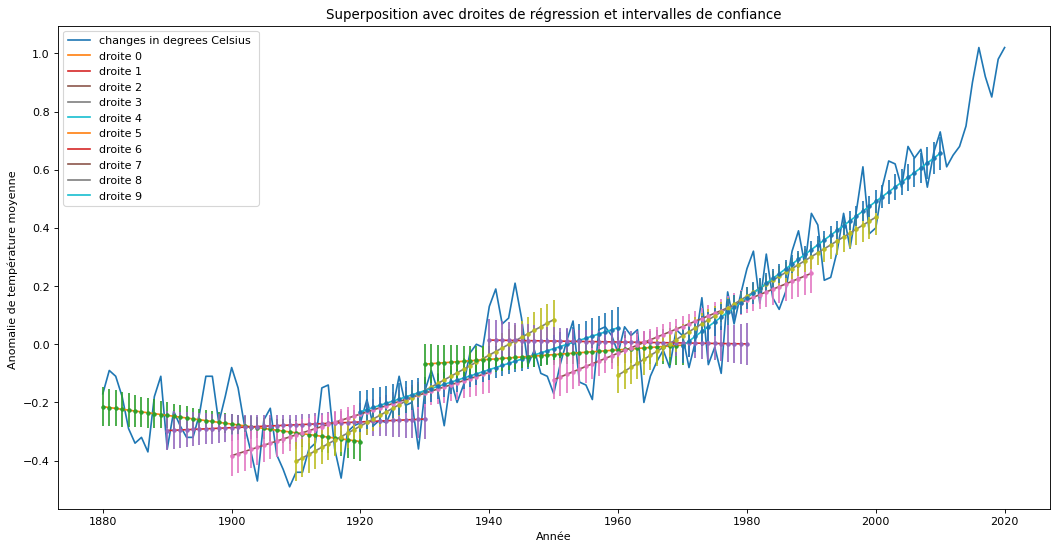

In [7]:
plt.figure(figsize=(16, 8), dpi=80)

#visualisons le graphe des observations
plt.plot(data['Year'], data['J-D'], label='changes in degrees Celsius ' )
#les droites de regression
for j in range(0, 10):
    
    t = np.array([ i for i in range(1880+j*10,1921+j*10)])
    debut_annee = pd.to_datetime(str(1880+j*10), format='%Y')
    fin_annee = pd.to_datetime(str(1920+j*10), format='%Y')
    periode = (data['Year'] >= debut_annee) & (data['Year'] <= fin_annee)
    T = data.loc[periode, 'Year']
    
    prediction = liste_beta_1[j] + liste_beta_2[j]*t
    plt.plot(T, prediction, label='droite {}'.format(j))
    #et les intervalles de confiance
    intervalles_confiance = []
    quantile = stats.t.ppf(1 - (0.05/2), 40-2)
    xm = np.mean(prediction)
    aux_sum = 0
    for xi in prediction:
        aux_sum += (xi - xm)**2
    for xi in prediction:
        err = quantile*np.sqrt(liste_std[j])*np.sqrt(1.0/40 + ((xi - xm)**2)/aux_sum)
        intervalles_confiance.append(err)
    plt.errorbar(T, prediction, yerr = intervalles_confiance, fmt='.')

plt.xlabel('Année')
plt.ylabel('Anomalie de température moyenne ')
plt.title('Superposition avec droites de régression et intervalles de confiance')

plt.legend()
plt.show()

<h2 align="center"> <font color='blue'>Exercice 6</font></h2> <a class="anchor" id="6"></a>

Alors, on veut visualiser pour chaque intervalle les résidues standardisés
$$ t_i = \frac{\hat{X}_i - X_i}{\hat{\sigma}\sqrt{1 - h_{ii}}} $$
où $H = (h_{ij})$ est la matrice qui satisfait $\hat{X} = HX$. Cette matrice est donnée par $H = T(T^TT)^{-1}T^T$. On a $h_{ii} = \frac{nt_i^2 - 2t_i\sum t_i + \sum t_i^2}{n\sum_{i=1}^{n} t_i^{2}-(\sum_{i=1}^{n} t_i)^{2}}$

In [14]:
residues = []
for j in range(0, 10):
    
    t = np.array([ i for i in range(1880+j*10,1921+j*10)])
    debut_annee = pd.to_datetime(str(1880+j*10), format='%Y')
    fin_annee = pd.to_datetime(str(1920+j*10), format='%Y')
    periode = (data['Year'] >= debut_annee) & (data['Year'] <= fin_annee)
    T = data.loc[periode, 'Year']
    
    obs = []
    for annee in T:
        # on utilise la méthode loc pour accéder à la valeur de 'J-D' pour 'Year' égal à annee
        valeur = data.loc[data['Year'] == annee, 'J-D'].values[0]
        obs.append(valeur)
    
    prediction = liste_beta_1[j] + liste_beta_2[j]*t
    #alors on calcule le residue pour chaque prevision
    intervalle_residues = []
    for i in range(41):
        sum_t = np.sum(t)
        sum_sq_t = np.sum(np.square(t))
        hii = (41*(t[i]**2) - 2*t[i]*sum_t + sum_sq_t)/(41*sum_sq_t - sum_t**2)
        residue = (xi - obs[i])/np.sqrt(liste_std[j]*(1 - hii))
        intervalle_residues.append(residue)
    #on garde les residues pour chaque intervalle de temps
    residues.append(intervalle_residues)
#on affiche tout les residues par intervalle
print(residues)

[[8.080582959781653, 7.271030690896985, 7.439660789024498, 8.092459689416502, 9.128555960388644, 9.583128521798079, 9.365523441727984, 9.8206631804221, 7.984201973952353, 7.30053819721006, 9.663778758515774, 8.413120067685156, 8.874082465764358, 9.24068384332564, 9.229882338940294, 8.465205069292775, 7.2315738057772965, 7.227045378742856, 8.732112044802783, 7.881583150505223, 6.938531106350979, 7.598853415665528, 8.826380548135011, 9.6791221697972, 10.62888445814981, 8.654096834314041, 8.284490379634452, 9.808582840289697, 10.295752086622368, 10.881139732925723, 10.424479968673177, 10.444438420582102, 9.70266736134658, 9.53359383552343, 7.734738411831472, 7.65938918187804, 9.803814803219314, 10.801873533393769, 9.284279766783381, 9.122151942158325, 9.058504006538778], [9.802721388334112, 8.51693028806308, 8.965801412458, 9.317975890601142, 9.289161390236433, 8.50336248236341, 7.25049847180568, 7.23245323400608, 8.72250002702215, 7.858470966117245, 6.905580878451121, 7.549064070688245, 

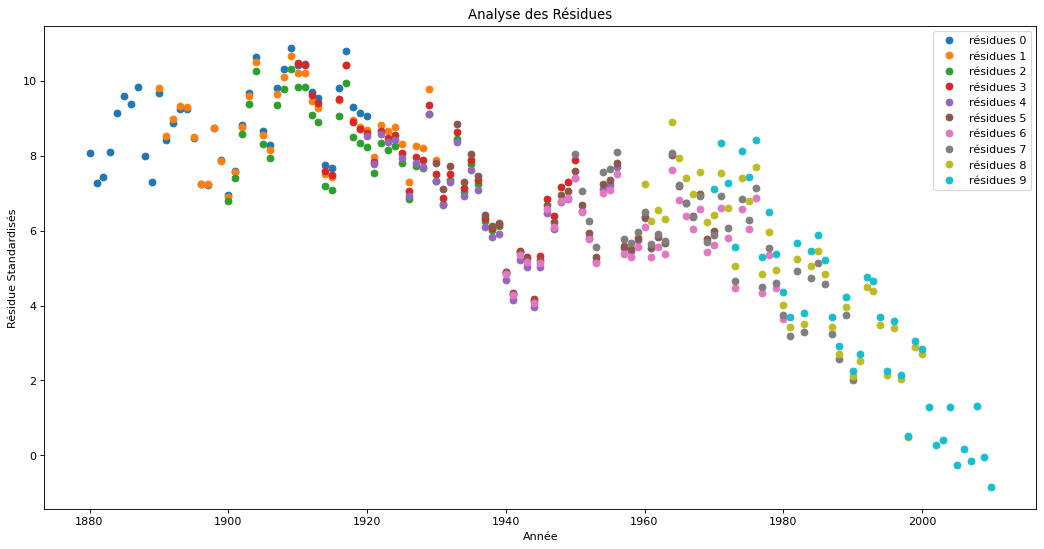

In [18]:
#alors, on peut visualiser les residues qu'on a calculé
plt.figure(figsize=(16, 8), dpi=80)
for j in range(0, 10):
    
    t = np.array([ i for i in range(1880+j*10,1921+j*10)])
    debut_annee = pd.to_datetime(str(1880+j*10), format='%Y')
    fin_annee = pd.to_datetime(str(1920+j*10), format='%Y')
    periode = (data['Year'] >= debut_annee) & (data['Year'] <= fin_annee)
    T = data.loc[periode, 'Year']
    
    plt.plot(T, residues[j], 'o', label='résidues {}'.format(j) )
    
plt.xlabel('Année')
plt.ylabel('Résidue Standardisés')
plt.title('Analyse des Résidues')
plt.legend()
plt.show()

<h2 align="center"> <font color='blue'>Exercice 7</font></h2> <a class="anchor" id="7"></a>